In [10]:
import numpy as np
import pandas as pd
import sklearn.ensemble as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import joblib
from sklearn.feature_selection import SelectFromModel
import pickle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

In [11]:
# reading data
df = pd.read_csv('dataset/windowsize/combined_20.csv', sep=',')
df.head()

,LBA,Entropy #1,Entropy #2,Class,Name
0,2288568,0.450898,0.450898,0,Malicious
1,2288576,0.519940,0.519940,0,Malicious
2,2288584,0.526247,0.526247,0,Malicious
3,2288592,0.512078,0.512078,0,Malicious
4,2288600,0.460444,0.460444,0,Malicious


In [12]:
# data preprocessing
data = df.drop(['LBA', 'Class', 'Name'], axis=1)
label = df['Class'].values
x = np.array(data)
y = np.array(label)
y = np.reshape(label, (-1, 1))

# apply normalization operation for numerical stability
standardizer = StandardScaler()
x = standardizer.fit_transform(x)

In [13]:
print('Target variables  : ', np.unique(df['Name']))

(unique, counts) = np.unique(df['Class'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  ['Benign' 'Malicious']
Unique values of the target variable [0 1]
Counts of the target variable : [75792 51319]


In [14]:
# splitting data in training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
test_size = 0.20, random_state = 0)
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Training Features Shape: (101688, 3)
Training Labels Shape: (101688, 1)
Testing Features Shape: (25423, 3)
Testing Labels Shape: (25423, 1)


/var/folders/nm/f1svv8090512jqvp27dkj_mr0000gn/T/ipykernel_2792/3793134265.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)
/var/folders/nm/f1svv8090512jqvp27dkj_mr0000gn/T/ipykernel_2792/3793134265.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_score = clf.fit(x_train, y_train)


Score: 98.72 %
True Positive(TP)  =  9937
False Positive(FP) =  24
True Negative(TN)  =  15111
False Negative(FN) =  351
True Postive Rate (TPR) =  0.9658825816485226
True Negative Rate (TNR) =  0.998414271555996
False Postive Rate (FPR) =  0.0015857284440039642
False Negative Rate (FNR) =  0.03411741835147745
Accuracy score:  0.9852495771545451
Precision score 0.9658825816485226
Recall score:  0.997590603353077
F1 score:  0.9814805669415775
Accuracy of the binary classification = 0.985
model score on training data: 0.9872157973408858
model score on testing data: 0.9852495771545451
Feature: 0, Score: 0.63182
Feature: 1, Score: 0.16867
Feature: 2, Score: 0.19951
RF ROC curve: ROC AUC=0.998


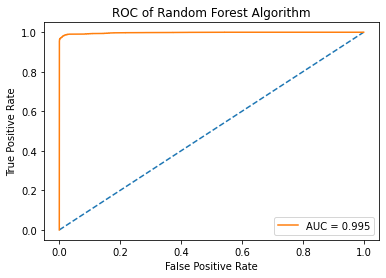

In [15]:
# train and evaluate model using RF
x, y = make_classification(n_samples=5000, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(n_estimators=10,max_depth=10)
clf.fit(x_train, y_train)
y_score = clf.fit(x_train, y_train)
score_rf = clf.score(x_train, y_train)
predictions = clf.predict(x_test)
print("Score:" ,round(score_rf * 100, 2),'%')

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(FN+TP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

print(f'model score on training data: {clf.score(x_train, y_train)}')
print(f'model score on testing data: {clf.score(x_test, y_test)}')

# get feature importance
importance = clf.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

y_true = np.array([0,1])

# ROC and AUC
random_classifier = [0 for x in range(len(y_test))]
rf_probs = clf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]

# calculate scores
roc_auc = roc_auc_score(y_test, random_classifier)
rf_auc = roc_auc_score(y_test, rf_probs)

print('RF ROC curve: ROC AUC=%.3f' % (rf_auc))

roc_fpr, roc_tpr, _ = roc_curve(y_test, random_classifier)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

pyplot.title("ROC of Random Forest Algorithm")
pyplot.plot(roc_fpr, roc_tpr, linestyle='--')
pyplot.plot(rf_fpr, rf_tpr, linestyle='-', label='AUC = 0.995')

# save the model
to_persist = ([x_test], [predictions])
joblib.dump(to_persist,'dataset/Model/rf_model.joblib')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

In [16]:
# train and evaluate model using SVM
clf = svm.SVC()
clf.fit(x_train, y_train)
y_score = clf.fit(x_train, y_train)
clf.predict(x_test)
predictions = clf.predict(x_test)

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision)
print('Recall score: ', recall)
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

print(f'model score on training data: {clf.score(x_train, y_train)}')
print(f'model score on testing data: {clf.score(x_test, y_test)}')

# ROC and AUC
# random_classifier = [0 for x in range(len(y_test))]
# svm_probs = clf.predict_proba(x_test)

# roc_auc = roc_auc_score(y_test, random_classifier)
# svm_auc = roc_auc_score(y_test, svm_probs)

#print('RF ROC curve: ROC AUC=%.3f' % (svm_auc))

#roc_fpr, roc_tpr, _ = roc_curve(y_test, random_classifier)
#svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

#pyplot.title("ROC of SVM Algorithm")
#pyplot.plot(roc_fpr, roc_tpr, linestyle='--')
#pyplot.plot(svm_fpr, svm_tpr, linestyle='-', label='AUC = 0.995')


# save the model
to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
                ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
joblib.dump(to_persist,'dataset/Model/svm_model.joblib')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


True Positive(TP)  =  9277
False Positive(FP) =  407
True Negative(TN)  =  14728
False Negative(FN) =  1011
True Postive Rate (TPR) =  0.9017301710730948
True Negative Rate (TNR) =  0.9731086884704327
False Postive Rate (FPR) =  0.09826982892690513
False Negative Rate (FNR) =  0.066798810703667
Accuracy score:  0.9442237344137199
Precision score 0.9017301710730948
Recall score:  0.9579719124328789
F1 score:  0.9290006008411776
Accuracy of the binary classification = 0.944
model score on training data: 0.9417335378805759
model score on testing data: 0.9442237344137199


['dataset/Model/svm_model.joblib']

In [17]:
# train and evaluate model using MLP
NN = MLPClassifier(activation='tanh', solver='lbfgs')
NN.fit(x_train, y_train)
predictions = NN.predict(x_test)
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision_score(predictions, y_test))
print('Recall score: ', recall_score(predictions, y_test))
print('F1 score:', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# save the model
#to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
#               ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
#joblib.dump(to_persist,'dataset/Model/mlp_model.joblib')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


True Positive(TP)  =  9559
False Positive(FP) =  510
True Negative(TN)  =  14625
False Negative(FN) =  729
True Postive Rate (TPR) =  0.9291407465007776
True Negative Rate (TNR) =  0.9663032705649157
False Postive Rate (FPR) =  0.0708592534992224
False Negative Rate (FNR) =  0.04816650148662042
Accuracy score:  0.951264602918617
Precision score 0.9291407465007776
Recall score:  0.9493494885291489
F1 score: 0.939136414992386
Accuracy of the binary classification = 0.951


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
# train and evaluate model using KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision_score(predictions, y_test))
print('Recall score: ', recall_score(predictions, y_test))
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
                ('Accuracy: ', accuracy), (('Data:', 'Prediction:'), (x_test, predictions))]
joblib.dump(to_persist,'dataset/Model/knn_model.joblib')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


True Positive(TP)  =  9895
False Positive(FP) =  168
True Negative(TN)  =  14967
False Negative(FN) =  393
True Postive Rate (TPR) =  0.9618001555209953
True Negative Rate (TNR) =  0.9888999008919722
False Postive Rate (FPR) =  0.038199844479004666
False Negative Rate (FNR) =  0.025966303270564917
Accuracy score:  0.9779333674231995
Precision score 0.9618001555209953
Recall score:  0.9833051773824903
F1 score:  0.9724337870374921
Accuracy of the binary classification = 0.978
Feature: 0, Score: 0.63182
Feature: 1, Score: 0.16867
Feature: 2, Score: 0.19951


['dataset/Model/knn_model.joblib']

In [19]:
# train and evaluate model using decision trees

dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FN/(TP+FN)
FNR = FN/(TN+FP)

print('True Postive Rate (TPR) = ', TPR)
print('True Negative Rate (TNR) = ', TNR)
print('False Postive Rate (FPR) = ', FPR)
print('False Negative Rate (FNR) = ', FNR)

precision = precision_score(predictions, y_test)
recall = recall_score(predictions, y_test)
f1 = 2 * (precision * recall) / (precision + recall)

print('Accuracy score: ', accuracy_score(predictions, y_test))
print('Precision score', precision_score(predictions, y_test))
print('Recall score: ', recall_score(predictions, y_test))
print('F1 score: ', f1)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

# get feature importance
importance = dt.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

to_persist = [('True Positve Rate: ', TPR), ('True Negative Rate: ', TNR), ('False Positive Rate: ', FPR), ('False Negative Rate: ', FNR), 
                ('Accuracy: ', accuracy), (x_test, predictions)]
joblib.dump(to_persist,'dataset/Model/dt_model.joblib')

True Positive(TP)  =  10157
False Positive(FP) =  123
True Negative(TN)  =  15012
False Negative(FN) =  131
True Postive Rate (TPR) =  0.9872667185069984
True Negative Rate (TNR) =  0.9918731417244797
False Postive Rate (FPR) =  0.012733281493001555
False Negative Rate (FNR) =  0.008655434423521638
Accuracy score:  0.9900090469260119
Precision score 0.9872667185069984
Recall score:  0.988035019455253
F1 score:  0.987650719564372
Accuracy of the binary classification = 0.990
Feature: 0, Score: 0.88800
Feature: 1, Score: 0.09031
Feature: 2, Score: 0.02169


['dataset/Model/dt_model.joblib']